In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df ['species'] = iris.target
print(df.head())
print(df.describe)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4       

In [3]:
X = df.drop('species', axis = 1)
y = df['species']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model = LogisticRegression().fit(X_train, y_train)

In [6]:
log_pred = log_model.predict(X_test)
log_pred_proba = log_model.predict_proba(X_test)
print("Logistic Accuracy", accuracy_score(y_test, log_pred))
print("Logistic Loss", log_loss(y_test, log_pred_proba))
print(classification_report(y_test, log_pred))

Logistic Accuracy 1.0
Logistic Loss 0.11114976847920098
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



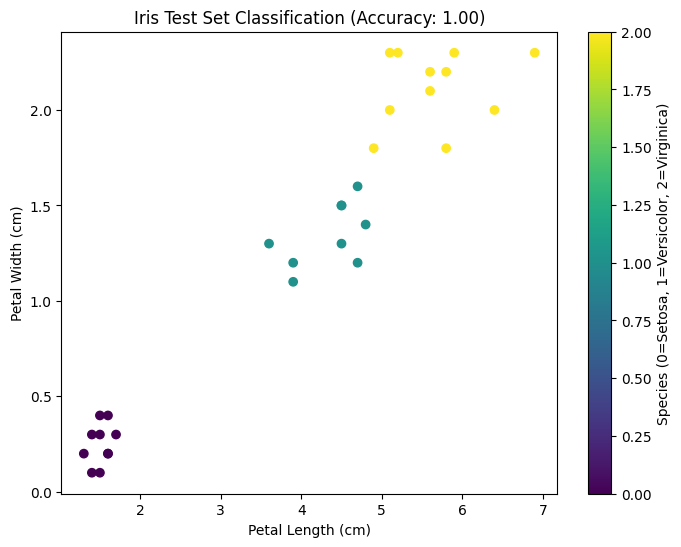

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Test Set Classification (Accuracy: {:.2f})'.format(accuracy_score(y_test, log_pred)))
plt.colorbar(scatter, label='Species (0=Setosa, 1=Versicolor, 2=Virginica)')
plt.savefig('iris_scatter.png')
plt.show()